<a href="https://colab.research.google.com/github/Rizkiramdani04/Portofolio_DS_DA/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
dataset=pd.read_csv('/content/car data.csv')
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
dataset.shape

(301, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
# encoding "Fuel_Type" Column
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

<ipython-input-7-b4cd29ddf65c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
<ipython-input-7-b4cd29ddf65c>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
<ipython-input-7-b4cd29ddf65c>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-i

In [ ]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
X=dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=dataset['Selling_Price']

In [ ]:
print(X)
print()
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
0    2014           5.59       27000          0            0             0      0
1    2013           9.54       43000          1            0             0      0
2    2017           9.85        6900          0            0             0      0
3    2011           4.15        5200          0            0             0      0
4    2014           6.87       42450          1            0             0      0
..    ...            ...         ...        ...          ...           ...    ...
296  2016          11.60       33988          1            0             0      0
297  2015           5.90       60000          0            0             0      0
298  2009          11.00       87934          0            0             0      0
299  2017          12.50        9000          1            0             0      0
300  2016           5.90        5464          0            0             0      0

[301 rows x 7 c

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
data_training=model.predict(X_train)

In [ ]:
error_score=metrics.r2_score(Y_train,data_training)
print("R squared error : ",error_score)

R squared error :  0.883979349675079


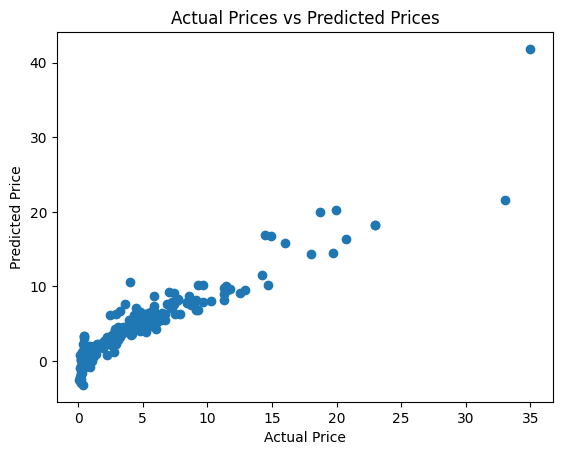

In [ ]:
plt.scatter(Y_train,data_training)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
data_test=model.predict(X_test)
error_score=metrics.r2_score(Y_test,data_test)
print("R squared error : ",error_score)

R squared error :  0.8468053957655798


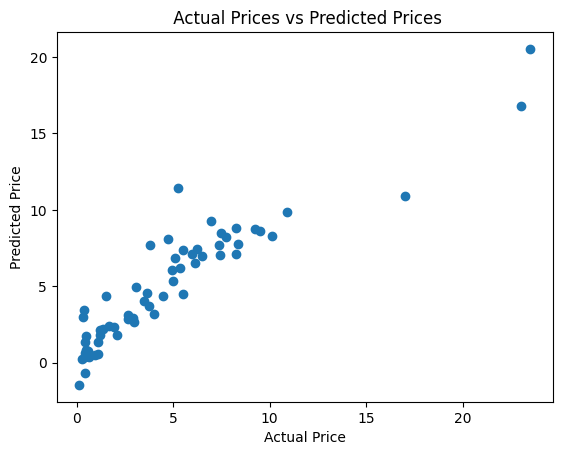

In [ ]:
plt.scatter(Y_test, data_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
model_las=Lasso()

In [ ]:
model_las.fit(X_train,Y_train)

Lasso()

In [ ]:
data_training_las=model_las.predict(X_train)
error_score_las=metrics.r2_score(Y_train,data_training_las)
print("R squared error : ",error_score_las)

R squared error :  0.848030286813716


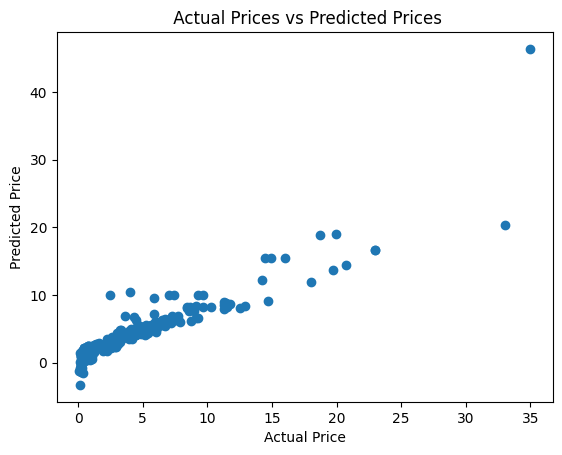

In [ ]:
plt.scatter(Y_train, data_training_las)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
data_test_las=model_las.predict(X_test)
error_score_las=metrics.r2_score(Y_test,data_test_las)
print("R squared error : ",error_score_las)

R squared error :  0.798551246128469


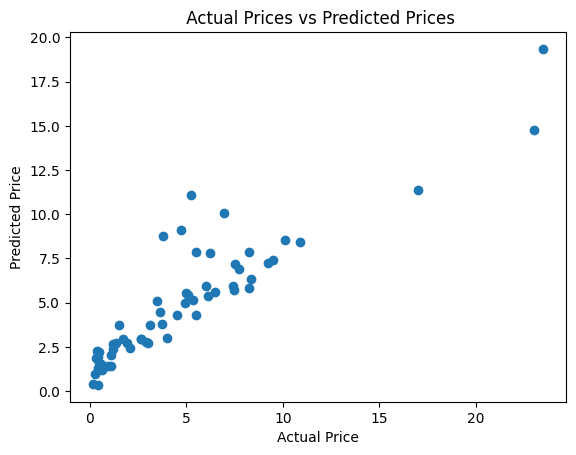

In [ ]:
plt.scatter(Y_test, data_test_las)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()